Arka Haldi

2018130014

BE Comps

# Tutorial 2

In [29]:
from sklearn.datasets import make_classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report,roc_curve,confusion_matrix
import pandas as pd
import seaborn as sns
%matplotlib inline

In [11]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% Test split

In [13]:
# define model
model = LinearDiscriminantAnalysis()

# Model evaluation method: Stratified k fold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
s = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(s), std(s)))

Mean Accuracy: 0.893 (0.033)


In [14]:
lda_param_grid = {"solver" : ["svd"],"tol" : [0.0001,0.0002,0.0003]}
grid_search = GridSearchCV(estimator=model, param_grid=lda_param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [15]:
print(f"Best: {grid_result.best_score_} using { grid_result.best_params_}\n")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.8925000000000001 using {'solver': 'svd', 'tol': 0.0001}



In [17]:
final_model = grid_result.best_estimator_
preds = final_model.predict(X_test)

In [19]:
c = pd.DataFrame({"Actual": y_test, "Predictions": preds})
c

Actual  Predictions
0         1            1
1         0            0
2         0            0
3         0            0
4         0            0
..      ...          ...
195       0            0
196       0            0
197       1            1
198       1            1
199       1            1

[200 rows x 2 columns]

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       108
           1       0.88      0.96      0.92        92

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



Confusion Matrix


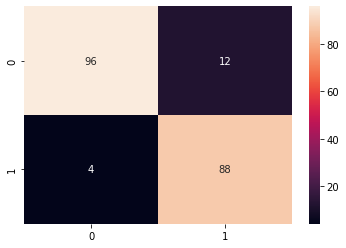

In [31]:
print('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [32]:
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision Score:", metrics.precision_score(y_test, predictions, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score:", metrics.recall_score(y_test, predictions, 
                                           pos_label='positive',
                                           average='micro'))

Accuracy: 0.92
Precision Score: 0.92
Recall Score: 0.92


C:\Users\aurko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\aurko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
